<a href="https://colab.research.google.com/github/ahmedimf1/DataScience/blob/master/InceptionV3_RockPaperScissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
  
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (300, 300, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

--2020-10-01 05:56:54--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 74.125.142.128, 173.194.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   134MB/s    in 0.6s    

2020-10-01 05:56:54 (134 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                 

In [ ]:
import tensorflow as tf

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (3, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 
model.compile(
    optimizer =tf.keras.optimizers.Adam(
      learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False), 
    loss = "categorical_crossentropy", 
    metrics = ['accuracy'])

Data

In [ ]:
import tensorflow_datasets as tfds
import numpy as np 

builder = tfds.builder('rock_paper_scissors')
ds_train = tfds.load(name = 'rock_paper_scissors', split= "train")
ds_test = tfds.load(name = 'rock_paper_scissors', split= "test")

In [ ]:
y_train = np.array([example["label"].numpy()for example in ds_train])
x_train = np.array([example["image"].numpy()[:,:,:]for example in ds_train])

y_test = np.array([example["label"].numpy()for example in ds_test])
x_test = np.array([example["image"].numpy()[:,:,:]for example in ds_test])

In [ ]:
train_images = x_train.astype("float32")
test_images = x_test.astype("float32")
train_images /= 255
test_images /= 255

In [ ]:
train_labels = tf.keras.utils.to_categorical(y_train, 3)
test_labels = tf.keras.utils.to_categorical(y_test, 3)

In [ ]:
train_images.shape

(2520, 300, 300, 3)

In [ ]:
history = model.fit(
            train_images,train_labels,
            validation_data = (test_images, test_labels),
            steps_per_epoch = 25,
            epochs = 10,
            validation_steps = 10,
            verbose = 1)

Epoch 1/10
25/25 [==============================] - 14s 566ms/step - loss: 18.2008 - accuracy: 0.7389 - val_loss: 14.4041 - val_accuracy: 0.6263
Epoch 2/10
25/25 [==============================] - 10s 410ms/step - loss: 0.1205 - accuracy: 0.9853 - val_loss: 4.6011 - val_accuracy: 0.8844
Epoch 3/10
25/25 [==============================] - 10s 411ms/step - loss: 0.0028 - accuracy: 0.9996 - val_loss: 3.4947 - val_accuracy: 0.8522
Epoch 4/10
25/25 [==============================] - 10s 412ms/step - loss: 3.4816e-08 - accuracy: 1.0000 - val_loss: 4.0115 - val_accuracy: 0.8145
Epoch 5/10
25/25 [==============================] - 10s 417ms/step - loss: 1.0046e-06 - accuracy: 1.0000 - val_loss: 4.0709 - val_accuracy: 0.8118
Epoch 6/10
25/25 [==============================] - 10s 414ms/step - loss: 1.4192e-10 - accuracy: 1.0000 - val_loss: 4.0743 - val_accuracy: 0.8118
Epoch 7/10
25/25 [==============================] - 10s 418ms/step - loss: 2.0299e-07 - accuracy: 1.0000 - val_loss: 4.0730 - va

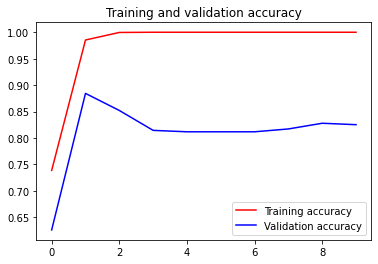

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

### Uploading a photo

Rock


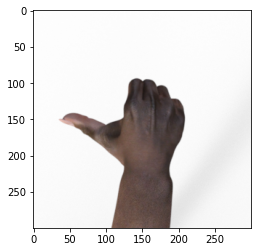

In [ ]:
img = train_images[0]
rgb_imgs = np.array([example["image"].numpy() for example in ds_train.take(500)])
rgb_img = rgb_imgs[30].astype("float32")/255
plt.imshow(rgb_img)
rgb_img = np.expand_dims(rgb_img, axis=0)
classes = {0:"Rock", 1:"Paper", 2:"Scissors"}
pred_idx =np.argmax(model.predict(rgb_img))
print(f'{classes[pred_idx]}')

### Uploading a photo

Saving paper (2).jpg to paper (2) (1).jpg
paper (2).jpg: Paper


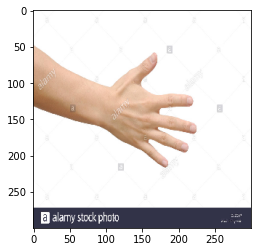

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
import imageio

uploaded = files.upload()

for fn in uploaded.keys():
  
  path = '/content/' + fn
  img = image.load_img(path, target_size = (300,300),color_mode='rgb')
  x = image.img_to_array(img)
  x/=255.
  plt.imshow(x)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  pred_idx = np.argmax(history.model.predict(images, batch_size = 10))
  print(f'{fn}: {classes[pred_idx]}')